# Performance Analysis of YouTube Channel: Insights on Views, Engagement, and Revenue

## Table of Contents
1. [Loading the datasets from Kaggle](##loading-the-datasets-from-kaggle)
2. [Understanding the Dataset](##understanding-the-dataset)
3. [Data cleaning and EDA](##data-cleaning-and-eda)
4. [KPI building](##kpi-building)
5. [Conclusions & Insights](##Conclusions-&-Insights)

In [1]:
import pandas as pd
from pathlib import Path
import kagglehub
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading the datasets from Kaggle

In [2]:
# Optional: where you want cleaned copies saved
PROJECT_DIR = Path.cwd() / "data" / "raw"
PROJECT_DIR.mkdir(parents=True, exist_ok=True)

pd.set_option("display.max_columns", None)

# To Converts messy column names like "Channel Name (Subs)" → channel_name_subs.
def snake_case_cols(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df.columns = [
        re.sub(r'\W+', '_', str(c)).strip('_').lower()
        for c in df.columns
    ]
    return df

#For downloading and loadind dataset
def dl_and_load(slug: str) -> tuple[pd.DataFrame, Path]:
    base = Path(kagglehub.dataset_download(slug))
    files = [p for p in base.rglob("*") if p.suffix.lower() in {".csv", ".xlsx", ".parquet"}]
    if not files:
        raise FileNotFoundError(f"No tabular files found under {base}.")
    priority = {".csv": 0, ".xlsx": 1, ".parquet": 2}
    files.sort(key=lambda p: (priority.get(p.suffix.lower(), 9), -p.stat().st_size))
    f = files[0]

    try:
        if f.suffix.lower() == ".csv":
            try:
                df = pd.read_csv(f, low_memory=False, encoding="utf-8")
            except UnicodeDecodeError:
                df = pd.read_csv(f, low_memory=False, encoding="latin1")
        elif f.suffix.lower() == ".xlsx":
            df = pd.read_excel(f)
        else:
            df = pd.read_parquet(f)
    except Exception as e:
        raise RuntimeError(f"Error reading {f.name}: {e}")
    return snake_case_cols(df), f

In [3]:
yt_perf_df, yt_perf_file = dl_and_load("positivealexey/youtube-channel-performance-analytics")
print(f"Loaded YouTube Performance Analytics from: {yt_perf_file}")
display(yt_perf_df.head(3), yt_perf_df.shape)

# Optional: Save raw copy
yt_perf_df.to_csv(PROJECT_DIR / "youtube_performance_raw.csv", index=False)


Loaded YouTube Performance Analytics from: C:\Users\mihir\.cache\kagglehub\datasets\positivealexey\youtube-channel-performance-analytics\versions\2\youtube_channel_real_performance_analytics.csv


,id,video_duration,video_publish_time,days_since_publish,day,month,year,day_of_week,revenue_per_1000_views_usd,monetized_playbacks_estimate,playback_based_cpm_usd,cpm_usd,ad_impressions,estimated_adsense_revenue_usd,doubleclick_revenue_usd,youtube_ads_revenue_usd,watch_page_ads_revenue_usd,youtube_premium_usd,transaction_revenue_usd,transactions,revenue_from_transactions_usd,reactions,chat_messages_count,reminders_set,stream_hours,remix_views,remix_count,subscribers_from_posts,new_comments,shares,like_rate,dislikes,likes,unsubscribes,new_subscribers,returned_items_usd,unconfirmed_commissions_usd,approved_commissions_usd,orders,total_sales_volume_usd,end_screen_click_through_rate,end_screen_impressions,end_screen_clicks,teaser_click_through_rate,teaser_impressions,teaser_clicks,card_click_through_rate,card_impressions,card_clicks,views_per_playlist_start,playlist_views,playlist_watch_time_hours,clip_watch_time_hours,clip_views,youtube_premium_watch_time_hours,youtube_premium_views,returning_viewers,new_viewers,average_views_per_user,unique_viewers,watched_not_skipped,feed_impressions,average_view_percentage,average_view_duration,views,watch_time_hours,subscribers,estimated_revenue_usd,impressions,video_thumbnail_ctr
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,1.386,1.021,981.0,0.527,0.024,1.002,0.551,0.010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.0,12.0,96.86,30.0,924.0,3.0,54.0,0.0,0.0,0.0,0.0,0.0,4.35,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.3333,10.0,0.2974,0.1575,10.0,2.5358,152.0,0.0,0.0,0.0,0.0,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,1.612,1.361,861.0,0.635,0.009,1.172,0.645,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,5.0,94.71,18.0,322.0,1.0,34.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5000,7.0,0.5187,0.0000,0.0,0.8911,32.0,0.0,0.0,0.0,0.0,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,2.105,1.818,88.0,0.088,0.000,0.160,0.088,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,92.28,20.0,239.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,11.0,0.1683,0.0000,0.0,0.1838,28.0,0.0,0.0,0.0,0.0,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07


(364, 70)

## Understanding the Dataset

### YouTube Channel Performance Analytics

In [4]:
yt_perf_df.head()

,id,video_duration,video_publish_time,days_since_publish,day,month,year,day_of_week,revenue_per_1000_views_usd,monetized_playbacks_estimate,playback_based_cpm_usd,cpm_usd,ad_impressions,estimated_adsense_revenue_usd,doubleclick_revenue_usd,youtube_ads_revenue_usd,watch_page_ads_revenue_usd,youtube_premium_usd,transaction_revenue_usd,transactions,revenue_from_transactions_usd,reactions,chat_messages_count,reminders_set,stream_hours,remix_views,remix_count,subscribers_from_posts,new_comments,shares,like_rate,dislikes,likes,unsubscribes,new_subscribers,returned_items_usd,unconfirmed_commissions_usd,approved_commissions_usd,orders,total_sales_volume_usd,end_screen_click_through_rate,end_screen_impressions,end_screen_clicks,teaser_click_through_rate,teaser_impressions,teaser_clicks,card_click_through_rate,card_impressions,card_clicks,views_per_playlist_start,playlist_views,playlist_watch_time_hours,clip_watch_time_hours,clip_views,youtube_premium_watch_time_hours,youtube_premium_views,returning_viewers,new_viewers,average_views_per_user,unique_viewers,watched_not_skipped,feed_impressions,average_view_percentage,average_view_duration,views,watch_time_hours,subscribers,estimated_revenue_usd,impressions,video_thumbnail_ctr
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,1.386,1.021,981.0,0.527,0.024,1.002,0.551,0.010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.0,12.0,96.86,30.0,924.0,3.0,54.0,0.0,0.0,0.0,0.0,0.0,4.35,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.3333,10.0,0.2974,0.1575,10.0,2.5358,152.0,0.0,0.0,0.0,0.0,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,1.612,1.361,861.0,0.635,0.009,1.172,0.645,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,5.0,94.71,18.0,322.0,1.0,34.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5000,7.0,0.5187,0.0000,0.0,0.8911,32.0,0.0,0.0,0.0,0.0,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,2.105,1.818,88.0,0.088,0.000,0.160,0.088,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,92.28,20.0,239.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,11.0,0.1683,0.0000,0.0,0.1838,28.0,0.0,0.0,0.0,0.0,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,1.667,0.857,35.0,0.016,0.000,0.030,0.016,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,7.0,94.02,14.0,220.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.6667,20.0,0.0640,0.0000,0.0,0.0711,20.0,0.0,0.0,0.0,0.0,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,7.0,76.98,180.0,602.0,3.0,31.0,0.0,0.0,0.0,0.0,0.0,0.00,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.6667,10.0,0.0611,0.0000,0.0,0.2519,39.0,0.0,0.0,0.0,0.0,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62


In [5]:
yt_perf_df.shape

(364, 70)

In [6]:
yt_perf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 70 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                364 non-null    int64  
 1   video_duration                    364 non-null    float64
 2   video_publish_time                364 non-null    object 
 3   days_since_publish                364 non-null    int64  
 4   day                               364 non-null    int64  
 5   month                             364 non-null    int64  
 6   year                              364 non-null    int64  
 7   day_of_week                       364 non-null    object 
 8   revenue_per_1000_views_usd        364 non-null    float64
 9   monetized_playbacks_estimate      364 non-null    float64
 10  playback_based_cpm_usd            364 non-null    float64
 11  cpm_usd                           364 non-null    float64
 12  ad_impre

In [7]:
 yt_perf_df.describe(include="all")

,id,video_duration,video_publish_time,days_since_publish,day,month,year,day_of_week,revenue_per_1000_views_usd,monetized_playbacks_estimate,playback_based_cpm_usd,cpm_usd,ad_impressions,estimated_adsense_revenue_usd,doubleclick_revenue_usd,youtube_ads_revenue_usd,watch_page_ads_revenue_usd,youtube_premium_usd,transaction_revenue_usd,transactions,revenue_from_transactions_usd,reactions,chat_messages_count,reminders_set,stream_hours,remix_views,remix_count,subscribers_from_posts,new_comments,shares,like_rate,dislikes,likes,unsubscribes,new_subscribers,returned_items_usd,unconfirmed_commissions_usd,approved_commissions_usd,orders,total_sales_volume_usd,end_screen_click_through_rate,end_screen_impressions,end_screen_clicks,teaser_click_through_rate,teaser_impressions,teaser_clicks,card_click_through_rate,card_impressions,card_clicks,views_per_playlist_start,playlist_views,playlist_watch_time_hours,clip_watch_time_hours,clip_views,youtube_premium_watch_time_hours,youtube_premium_views,returning_viewers,new_viewers,average_views_per_user,unique_viewers,watched_not_skipped,feed_impressions,average_view_percentage,average_view_duration,views,watch_time_hours,subscribers,estimated_revenue_usd,impressions,video_thumbnail_ctr
count,364.000000,364.000000,364,364.000000,364.000000,364.000000,364.000000,364,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.0,364.0,364.0,364.0,364.0,364.0,364.0,364.0,364.0,364.0,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.0,364.0,364.0,364.0,364.0,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.0,364.0,364.0,364.0,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,3.640000e+02,364.000000
unique,NaN,NaN,357,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2023-12-26 00:00:00,NaN,NaN,NaN,NaN,Sunday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2,NaN,NaN,NaN,NaN,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,181.500000,664.239011,NaN,8.406593,15.807692,6.642857,2018.736264,NaN,0.112283,8934.711538,1.553734,1.059005,15117.953297,7.811525,0.635734,15.363964,8.447223,0.404810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,333.846154,252.958791,97.339203,123.961538,5526.733516,28.906593,349.931319,0.0,0.0,0.0,0.0,0.0,1.551676,6561.980769,224.934066,0.324725,4131.986264,81.318681,3.291044,142.689560,19.115385,2.644910,300.810440,24.830608,0.068246,5.923077,115.206959,1303.763736,0.0,0.0,0.0,0.0,0.824176,0.008242,45.970989,285.612637,128800.101648,10058.965455,321.024725,8.852052,9.595286e+05,7.914615
std,105.221988,330.646183,NaN,15.371239,8.924004,3.421521,2.530629,NaN,0.179668,12967.843236,1.078549,0.728380,24339.924215,12.778813,1.393079,23.614172,12.993395,0.595196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,291.934648,363.016405,2.308451,128.311620,4465.210998,48.591932,468.539050,0.0,0.0,0.0,0.0,0.0,3.031638,14829.019211,787.523948,0.923491,13523.976449,352.030814,10.338442,669.114645,82.516801,1.917453,555.976093,38.958396,0.209388,14.290941,128.827059,1343.028080,0.0,0.0,0.0,0.0,9.053369,0.090534,12.457470,116.595678,118209.844270,9516.160361,444.594763,13.414650,1.180519e+06,2.903383
min,0.000000,9.000000,NaN,0.0

## Data cleaning and EDA

In [8]:
# Making copy to preserve original dataset.
df = yt_perf_df.copy()

In [9]:
# Dropping features with no information.
df = df.drop(columns=["transaction_revenue_usd","transactions", "revenue_from_transactions_usd", "reactions", "chat_messages_count", "reminders_set", "stream_hours", "remix_views", "remix_count", "subscribers_from_posts", "returned_items_usd", "unconfirmed_commissions_usd"	, "approved_commissions_usd", "orders", "total_sales_volume_usd", "returning_viewers", "new_viewers", "average_views_per_user", "unique_viewers"])

In [10]:
# Parse datetime & derive time features
df["video_publish_time"] = pd.to_datetime(df["video_publish_time"], errors="coerce")
df["publish_hour"] = df["video_publish_time"].dt.hour
df["publish_date"] = df["video_publish_time"].dt.date

In [11]:
# Known non-numeric columns
non_numeric = {"video_publish_time", "day_of_week", "publish_date"}

# Force numeric for everything else (safe, given your dtypes dump)
for col in df.columns:
    if col not in non_numeric:
        df[col] = pd.to_numeric(df[col], errors="coerce")

In [12]:
# Basic sanity: clip impossible negative values to 0 for count-like columns
count_like = [
    "views","likes","dislikes","comments","shares","impressions",
    "ad_impressions","monetized_playbacks_estimate","end_screen_impressions",
    "end_screen_clicks","teaser_impressions","teaser_clicks",
    "card_impressions","card_clicks","unique_viewers","returning_viewers",
    "new_viewers","orders","transactions","subscribers","new_subscribers",
    "unsubscribes","playlist_views","clip_views","youtube_premium_views"
]
for c in set(count_like).intersection(df.columns):
    df[c] = df[c].clip(lower=0)

In [13]:
# Fill NA with 0 for metrics (keeps math simple)
metric_cols = [c for c in df.columns if c not in non_numeric]
df[metric_cols] = df[metric_cols].fillna(0.0)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                364 non-null    int64         
 1   video_duration                    364 non-null    float64       
 2   video_publish_time                364 non-null    datetime64[ns]
 3   days_since_publish                364 non-null    int64         
 4   day                               364 non-null    int64         
 5   month                             364 non-null    int64         
 6   year                              364 non-null    int64         
 7   day_of_week                       364 non-null    object        
 8   revenue_per_1000_views_usd        364 non-null    float64       
 9   monetized_playbacks_estimate      364 non-null    float64       
 10  playback_based_cpm_usd            364 non-null    

In [14]:
# Total views in Millions
df['views'].sum()/1000000

46.883237

In [15]:
# Total watch time hours 
df['watch_time_hours'].sum()

3661463.4258

In [16]:
# Net subscribers gained
df['new_subscribers'].sum() - df['unsubscribes'].sum()

116853.0

In [17]:
# Total estimated revenue
df['estimated_revenue_usd'].sum()

3222.147

In [18]:
# Average engagement rate
((df['likes'] + df['new_comments'] + df['shares']) / df['views'] * 100).mean()

5.443156321857764

In [19]:
# Average RPM USD
df['revenue_per_1000_views_usd'].mean()

0.11228296703296704

## KPI building

When influencer marketing agencies or brands evaluate content creators for partnerships, they typically analyze a mix of **performance metrics (KPIs), audience quality, and content alignment**. These factors help them determine whether a creator can deliver reach, engagement, and conversions for the campaign.

And these are the KPI that content creator optimize for. We will look into all the relevant KPI which are relevant for Content creators and Marketing agencies which are available in dataset.

#### Engagements

In [20]:
# engagements = likes + comments + shares
df["engagements"] = df.get("likes",0) + df.get("new_comments",0) + df.get("shares",0)

# er_per_view = engagements / views
df["er_per_view"] = np.where(df["views"]>0, df["engagements"]/df["views"], np.nan)

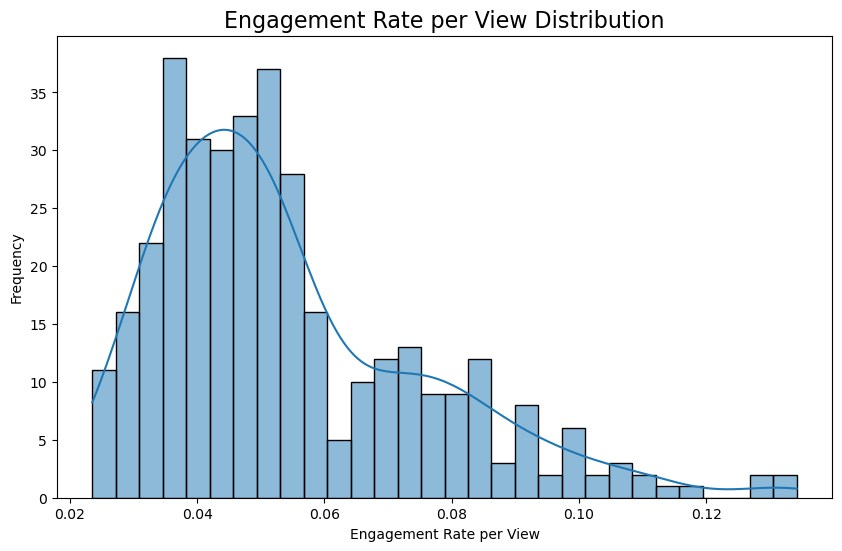

In [21]:
# Distribution of Engagement Rate
plt.figure(figsize=(10,6))
sns.histplot(df['er_per_view'], bins=30, kde=True)
plt.title('Engagement Rate per View Distribution', fontsize=16)
plt.xlabel('Engagement Rate per View')
plt.ylabel('Frequency')
plt.show()

Only 5% of viewers engage with channel by liking, commenting and sharing. 

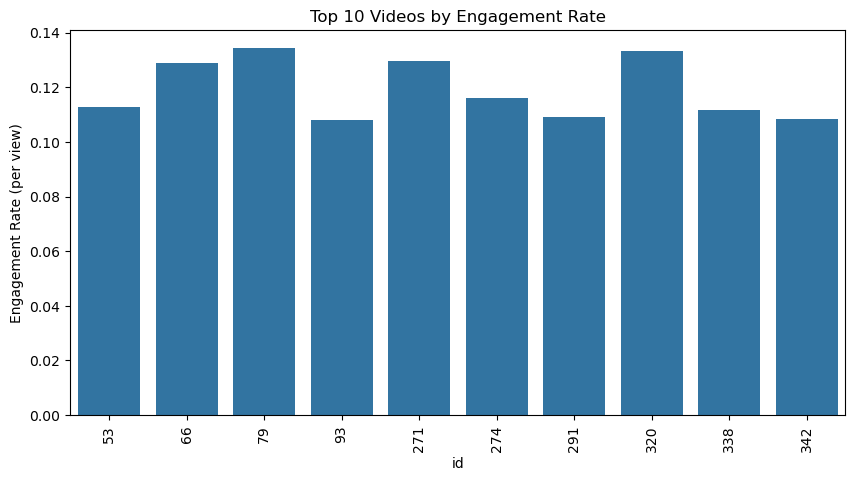

In [22]:
# Top 10 Videos by Engagement Rate
top_eng = df.nlargest(10, "er_per_view").copy()
plt.figure(figsize=(10,5))
sns.barplot(x="id", y="er_per_view", data=top_eng)
plt.xticks(rotation=90)
plt.ylabel("Engagement Rate (per view)")
plt.title("Top 10 Videos by Engagement Rate")
plt.show()

Highest engagement achieved on any video is around 13%.

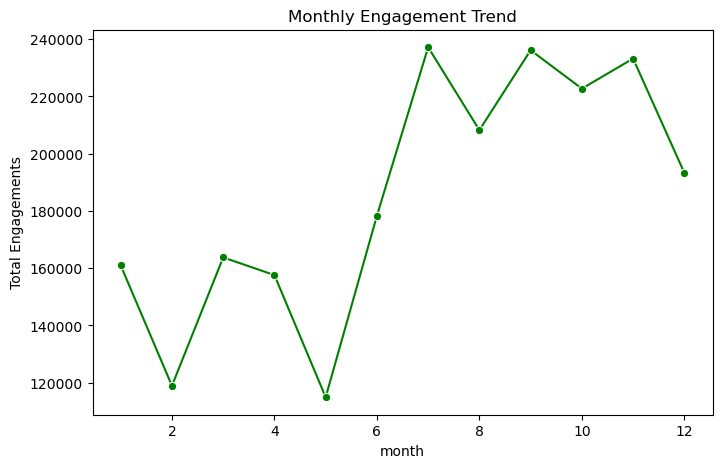

In [23]:
# Monthly Engagement Trend
monthly_eng = df.groupby("month", as_index=False)["engagements"].sum()
plt.figure(figsize=(8,5))
sns.lineplot(x="month", y="engagements", data=monthly_eng, marker="o", color="green")
plt.ylabel("Total Engagements")
plt.title("Monthly Engagement Trend")
plt.show()

Second half of the year have cumulatively generate more views and engagement.

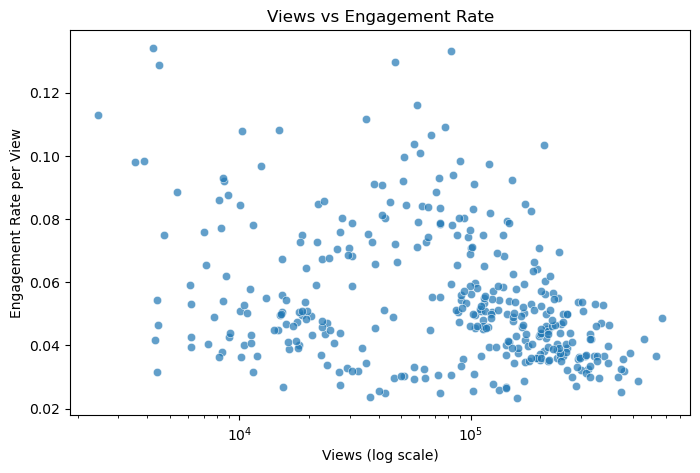

In [24]:
# Engagement rate vs Views
plt.figure(figsize=(8,5))
sns.scatterplot(x="views", y="er_per_view", data=df, alpha=0.7)
plt.xscale("log")  # Handles large variation in views
plt.xlabel("Views (log scale)")
plt.ylabel("Engagement Rate per View")
plt.title("Views vs Engagement Rate")
plt.show()

Videos with higher view counts have low engagement rate can be because non subscriber views.

#### Retention & duration

In [25]:
# retention_pct = average_view_percentage / 100
df["retention_pct"] = df["average_view_percentage"] / 100.0
df["avg_view_duration_sec"] = df["average_view_duration"]  # already in seconds per your sample

# avg_views_per_minute = views / (video_duration/60)
df["avg_views_per_minute"] = np.where(df["video_duration"]>0, df["views"]/(df["video_duration"]/60.0), np.nan)

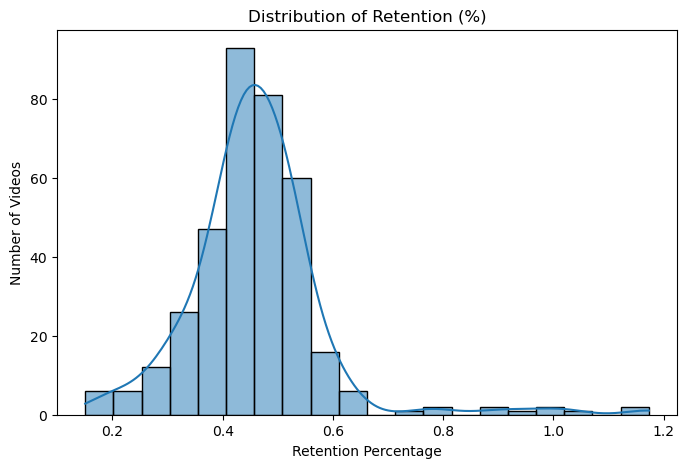

In [26]:
# Retention Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['retention_pct'], kde=True, bins=20)
plt.title("Distribution of Retention (%)")
plt.xlabel("Retention Percentage")
plt.ylabel("Number of Videos")
plt.show()

This youtube channel has on average 45% of retention rate.

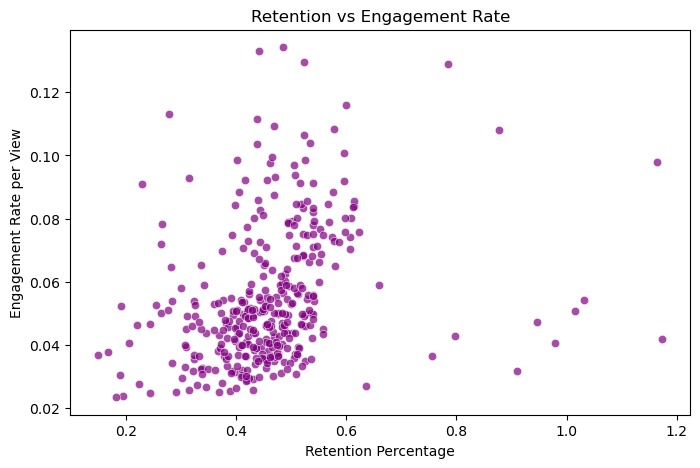

In [27]:
#Retention vs Engagement Rate
plt.figure(figsize=(8,5))
sns.scatterplot(x="retention_pct", y="er_per_view", data=df, color="purple", alpha=0.7)
plt.xlabel("Retention Percentage")
plt.ylabel("Engagement Rate per View")
plt.title("Retention vs Engagement Rate")
plt.show()


There is no significant relation relationship between Retention and Engagement rate but we can observe that very few videos have retention rate above 60%.

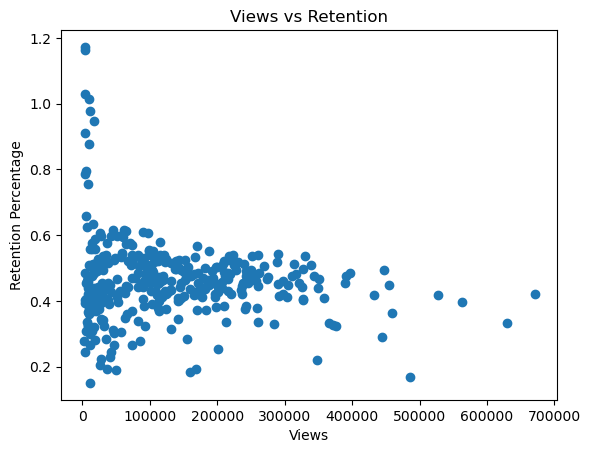

In [28]:
#Retention vs Views
plt.scatter(df["views"], df["retention_pct"])
plt.xlabel("Views")
plt.ylabel("Retention Percentage")
plt.title("Views vs Retention")
plt.show()

#### Monetization

In [29]:
# rpm_calc = estimated_revenue_usd / views * 1000 (check vs revenue_per_1000_views_usd)
df["rpm_calc"] = np.where(df["views"]>0, df["estimated_revenue_usd"]/df["views"]*1000.0, np.nan)

# monetized_playbacks_rate = monetized_playbacks_estimate / views
df["monetized_playbacks_rate"] = np.where(df["views"]>0, df["monetized_playbacks_estimate"]/df["views"], np.nan)

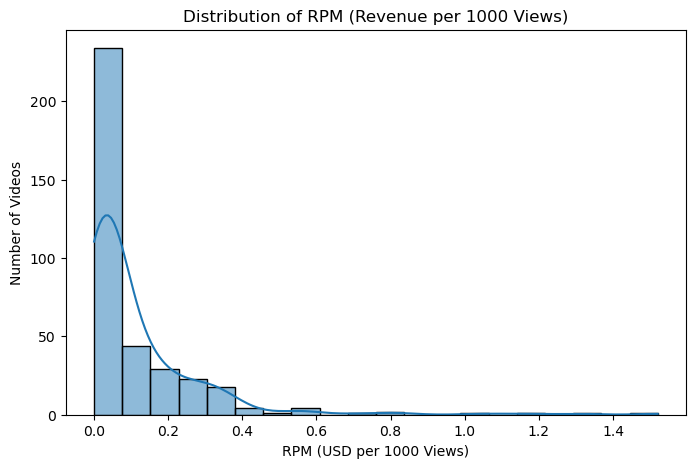

In [30]:
# RPM Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['rpm_calc'], kde=True, bins=20)
plt.title("Distribution of RPM (Revenue per 1000 Views)")
plt.xlabel("RPM (USD per 1000 Views)")
plt.ylabel("Number of Videos")
plt.show()

Majority of videos from this channel generate low RPM. The reason for low RPM is low views.

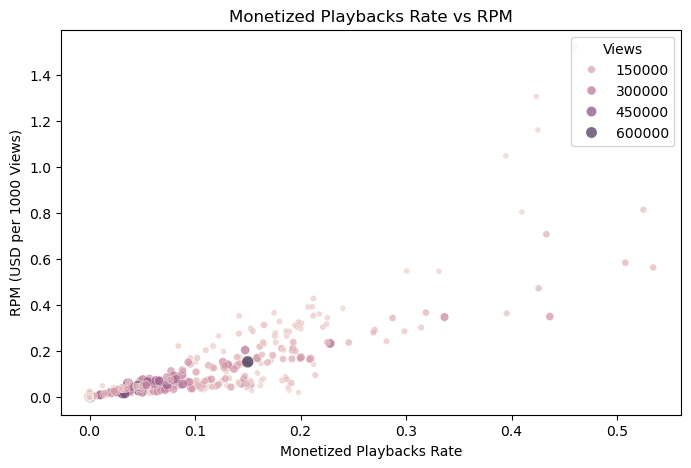

In [31]:
# Monetized Playbacks Rate vs RPM
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='monetized_playbacks_rate', 
    y='rpm_calc', 
    size='views', 
    hue='views',
    data=df, alpha=0.7
)
plt.title("Monetized Playbacks Rate vs RPM")
plt.xlabel("Monetized Playbacks Rate")
plt.ylabel("RPM (USD per 1000 Views)")
plt.legend(title="Views", loc="upper right")
plt.show()

Playbacks directly influence RPM.

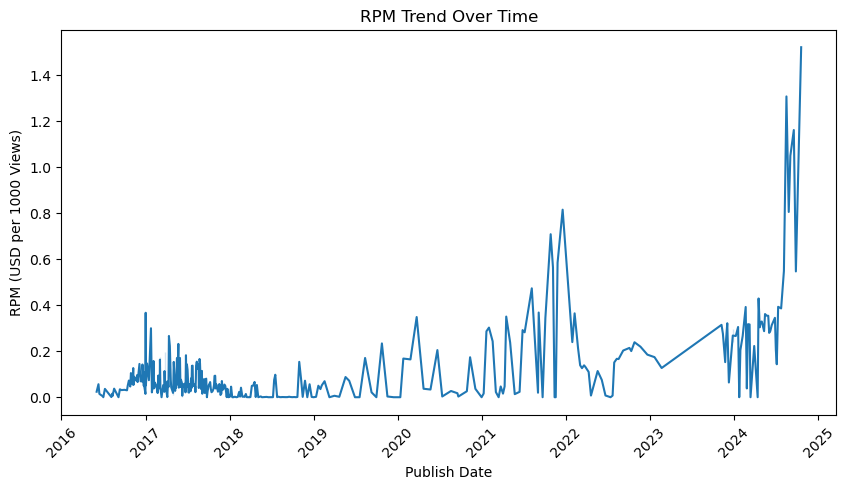

In [32]:
# Revenue Trend Over Time
plt.figure(figsize=(10,5))
sns.lineplot(
    x='video_publish_time', 
    y='rpm_calc', 
    data=df.sort_values('video_publish_time')
)
plt.title("RPM Trend Over Time")
plt.xlabel("Publish Date")
plt.ylabel("RPM (USD per 1000 Views)")
plt.xticks(rotation=45)
plt.show()

RPM has increased in last 1 year and there is growing trend. 

#### Thumbnail CTR

In [33]:
# Thumbnail CTR: dataset has already in %; we also provide fraction
# ctr_thumbnail (recompute) = video_thumbnail_ctr / 100 if you want a fraction
df["thumbnail_ctr_frac"] = df["video_thumbnail_ctr"] / 100.0

In [34]:
# End screen / teaser / card CTR sanity
for pair, out in [
    (("end_screen_clicks","end_screen_impressions"),"end_screen_ctr_calc"),
    (("teaser_clicks","teaser_impressions"),"teaser_ctr_calc"),
    (("card_clicks","card_impressions"),"card_ctr_calc"),
]:
    clicks, imps = pair
    if clicks in df.columns and imps in df.columns:
        df[out] = np.where(df[imps]>0, df[clicks]/df[imps], np.nan)

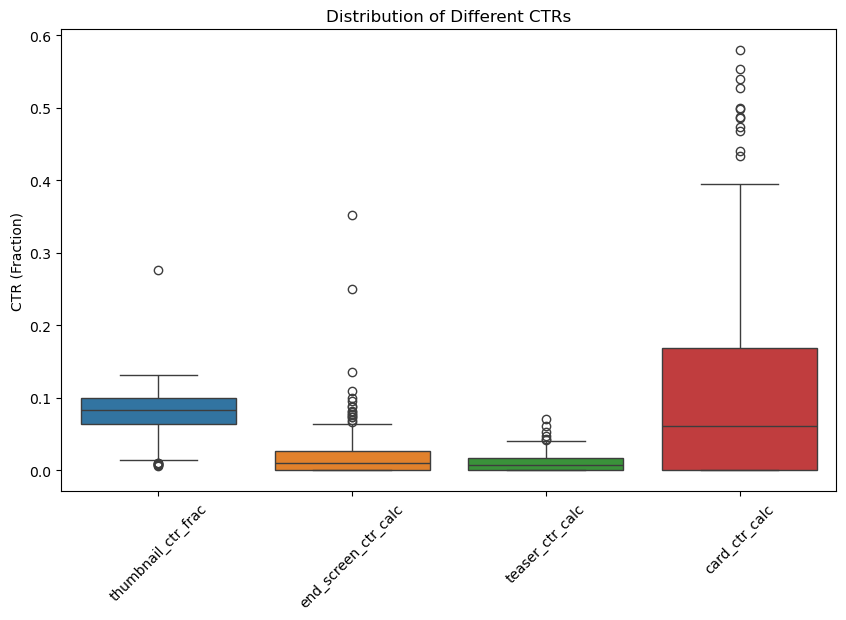

In [35]:
# CTR Distribution Across Elements
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df[['thumbnail_ctr_frac','end_screen_ctr_calc','teaser_ctr_calc','card_ctr_calc']]
)
plt.title("Distribution of Different CTRs")
plt.ylabel("CTR (Fraction)")
plt.xticks(rotation=45)
plt.show()

Average CTR of thumbnail is higher but spread of Card CTR is higher with many outliers. Which means Cards feature can be optimized for more views. 

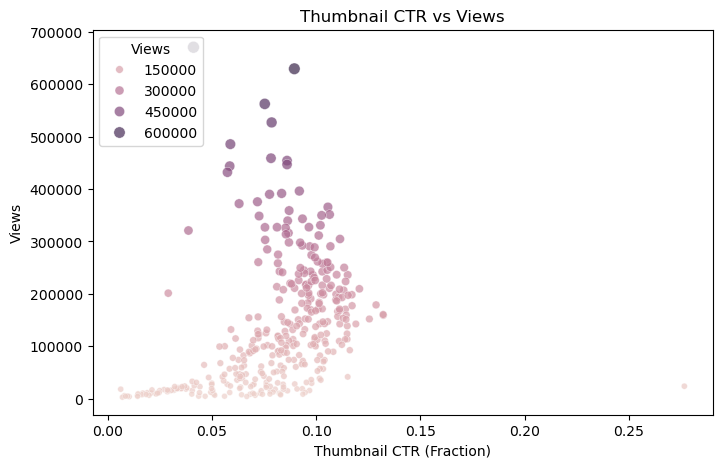

In [36]:
# Thumbnail CTR vs Views
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='thumbnail_ctr_frac', 
    y='views', 
    size='views',
    hue='views',
    data=df,
    alpha=0.7
)
plt.title("Thumbnail CTR vs Views")
plt.xlabel("Thumbnail CTR (Fraction)")
plt.ylabel("Views")
plt.legend(title="Views", loc="upper left")
plt.show()

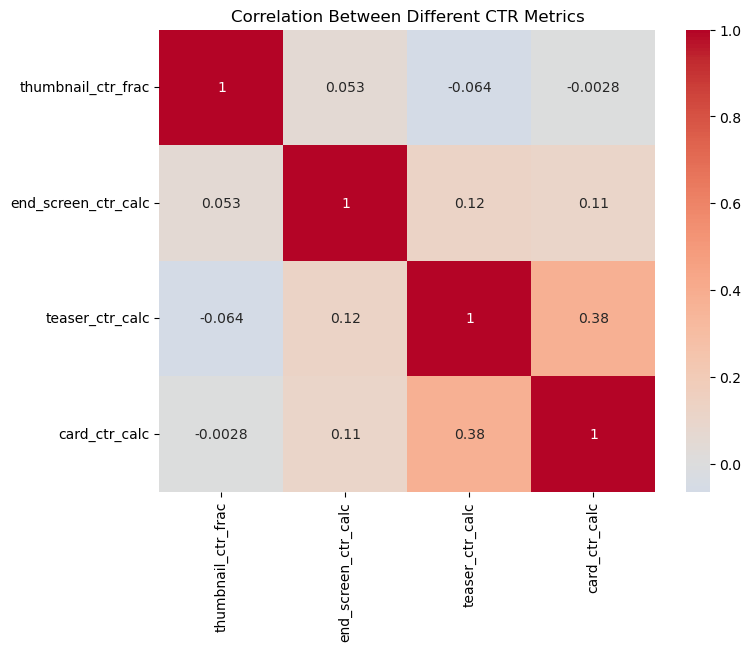

In [37]:
# Correlation Heatmap of All CTR Metrics
plt.figure(figsize=(8,6))
ctr_cols = ['thumbnail_ctr_frac','end_screen_ctr_calc','teaser_ctr_calc','card_ctr_calc']
sns.heatmap(df[ctr_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Between Different CTR Metrics")
plt.show()

All values are close to 0 which indicated that there is weak or no sigificant correlation between Click-throught rate KPIs.

#### Subscribers movement

In [38]:
# net_subs = new_subscribers − unsubscribes
df["net_subs"] = df.get("new_subscribers",0) - df.get("unsubscribes",0)

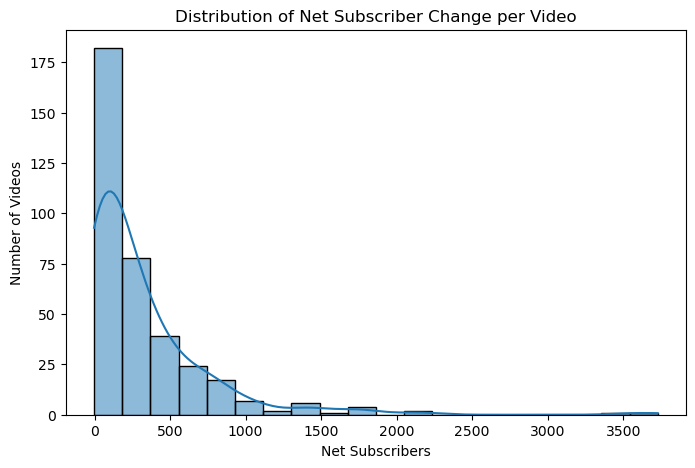

In [39]:
# Distribution of Net Subscriber Gains
plt.figure(figsize=(8,5))
sns.histplot(df['net_subs'], bins=20, kde=True)
plt.title("Distribution of Net Subscriber Change per Video")
plt.xlabel("Net Subscribers")
plt.ylabel("Number of Videos")
plt.show()

Most videos individually have persuaded very less numbers of viewers. 

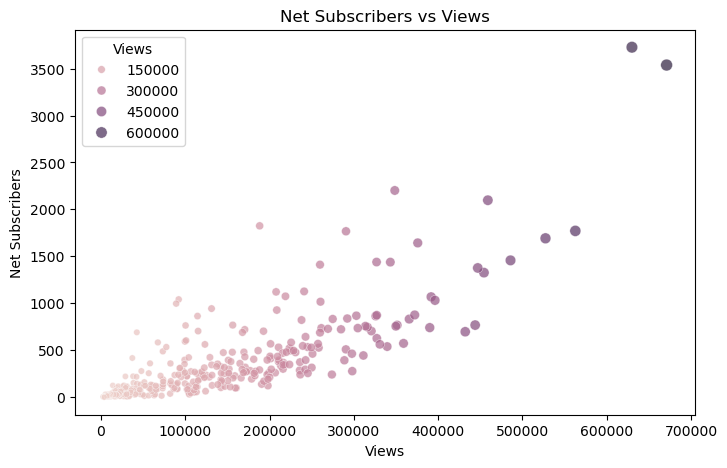

In [40]:
# Net Subscribers vs Views
plt.figure(figsize=(8,5))
sns.scatterplot(x='views', y='net_subs', size='views', hue='views', data=df, alpha=0.7)
plt.title("Net Subscribers vs Views")
plt.xlabel("Views")
plt.ylabel("Net Subscribers")
plt.legend(title="Views", loc="upper left")
plt.show()

Higher views on videos directly transfer to higher count of subscriber gains.

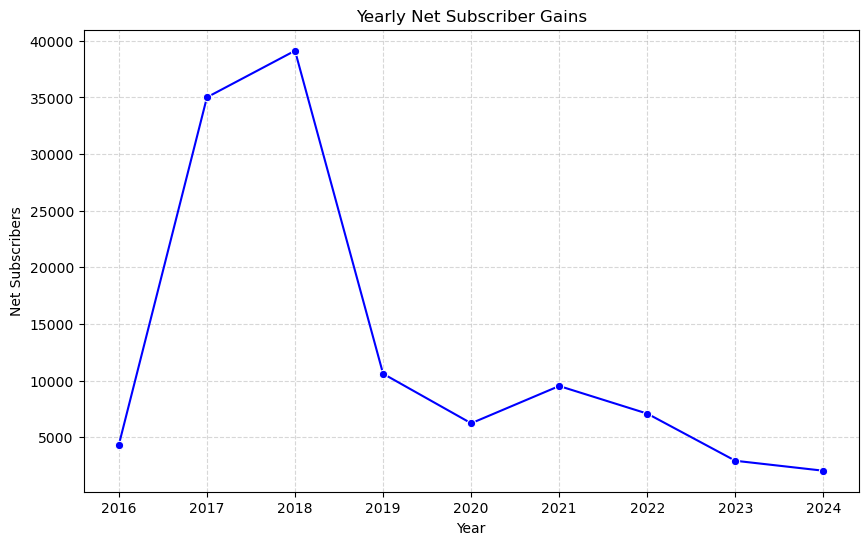

In [41]:
# Aggregate net subscriber gains per year
yearly_net_subs = df.groupby("year")["net_subs"].sum().reset_index()

# Plot using seaborn
plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_net_subs, x="year", y="net_subs", marker='o', color='blue')
plt.title("Yearly Net Subscriber Gains")
plt.xlabel("Year")
plt.ylabel("Net Subscribers")
plt.xticks(yearly_net_subs["year"].unique())  # Ensure all years show
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Only 2017 and 2018 had significant increase in subscriber compared to later years.

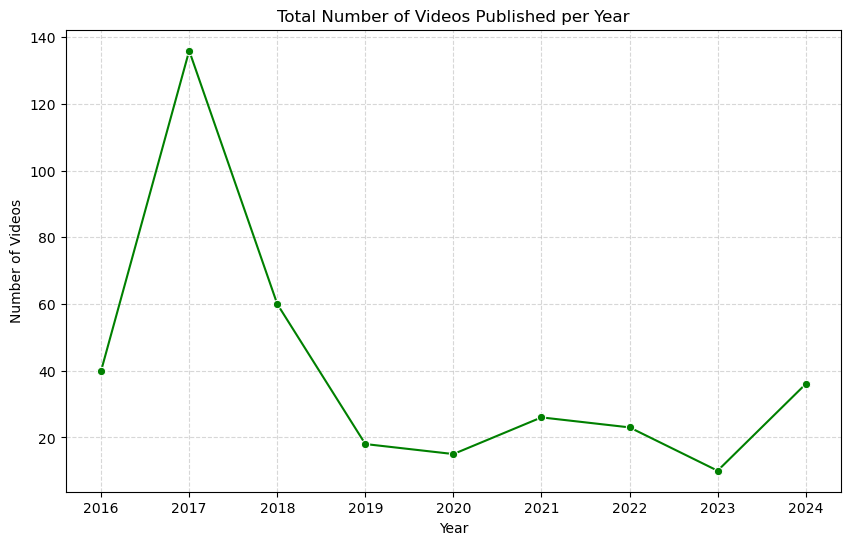

In [42]:
# Aggregate total videos published per year
videos_per_year = df.groupby("year")["id"].count().reset_index()
videos_per_year.rename(columns={"id": "total_videos"}, inplace=True)

# Plot using seaborn
plt.figure(figsize=(10,6))
sns.lineplot(data=videos_per_year, x="year", y="total_videos", marker='o', color='green')
plt.title("Total Number of Videos Published per Year")
plt.xlabel("Year")
plt.ylabel("Number of Videos")
plt.xticks(videos_per_year["year"].unique())  # Ensure all years are shown
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Initial subsciber gains were due to higher numbers of videos published.

#### Revenue Breakdown

In [43]:
# Revenue breakdown (sum and reconcile to estimated_revenue_usd)
rev_parts = [
    "estimated_adsense_revenue_usd", "doubleclick_revenue_usd",
    "youtube_ads_revenue_usd", "watch_page_ads_revenue_usd",
    "youtube_premium_usd", "transaction_revenue_usd",
    "revenue_from_transactions_usd", "returned_items_usd",
    "approved_commissions_usd", "unconfirmed_commissions_usd",
    "total_sales_volume_usd"  # not revenue but useful for ratios
]
present_parts = [c for c in rev_parts if c in df.columns]
df["revenue_parts_sum"] = df[present_parts].sum(axis=1)
df["revenue_gap_vs_estimated"] = df["estimated_revenue_usd"] - df["revenue_parts_sum"]

df[[
    "views","estimated_revenue_usd","revenue_per_1000_views_usd","rpm_calc",
    "monetized_playbacks_estimate","monetized_playbacks_rate",
    "engagements","er_per_view","retention_pct","thumbnail_ctr_frac","net_subs",
    "revenue_parts_sum","revenue_gap_vs_estimated"
]].head(5)

,views,estimated_revenue_usd,revenue_per_1000_views_usd,rpm_calc,monetized_playbacks_estimate,monetized_playbacks_rate,engagements,er_per_view,retention_pct,thumbnail_ctr_frac,net_subs,revenue_parts_sum,revenue_gap_vs_estimated
0,23531.0,0.561,0.024,0.023841,723.0,0.030725,1027.0,0.043645,0.4038,0.2766,51.0,2.114,-1.553
1,11478.0,0.648,0.056,0.056456,727.0,0.063339,362.0,0.031539,0.3985,0.0585,33.0,2.465,-1.817
2,6153.0,0.089,0.014,0.014464,76.0,0.012352,243.0,0.039493,0.3088,0.0707,8.0,0.337,-0.248
3,4398.0,0.017,0.004,0.003865,18.0,0.004093,239.0,0.054343,1.0305,0.0560,2.0,0.062,-0.045
4,14659.0,0.000,0.000,0.000000,0.0,0.000000,659.0,0.044955,0.5570,0.0862,28.0,0.000,0.000


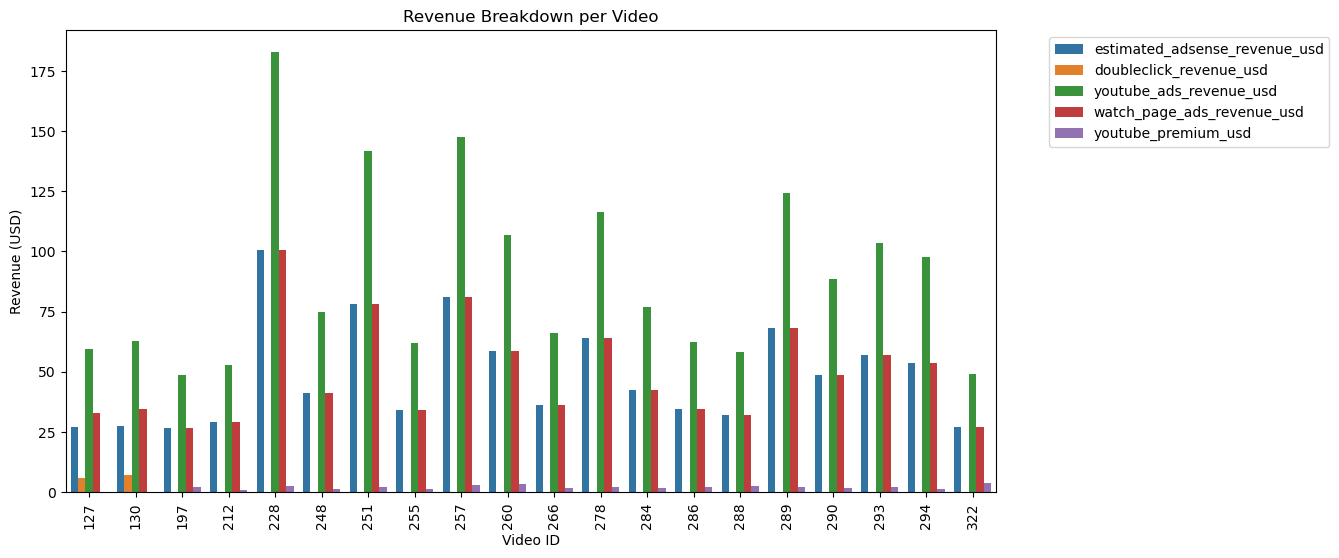

In [44]:
# Select top 20 videos by estimated revenue for clarity
top_videos = df.nlargest(20, "estimated_revenue_usd").copy()

# Melt revenue components for seaborn plotting
revenue_melted = top_videos.melt(
    id_vars=["id","estimated_revenue_usd"], 
    value_vars=present_parts, 
    var_name="revenue_source", 
    value_name="revenue_usd"
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=revenue_melted,
    x="id",
    y="revenue_usd",
    hue="revenue_source"
)
plt.xticks(rotation=90)
plt.title("Revenue Breakdown per Video")
plt.xlabel("Video ID")
plt.ylabel("Revenue (USD)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Other Visualization

#### Views by Duration Bin

In [46]:
# What video durations retain viewers best? Is there a sweet spot?
bins = [0,60,180,300,600,1200,3600]  # ≤1m, 1–3m, 3–5m, 5–10m, 10–20m, 20–60m
labels = ["≤1m","1–3m","3–5m","5–10m","10–20m","20–60m"]
df["duration_bin"] = pd.cut(df["video_duration"], bins=bins, labels=labels, include_lowest=True)

dur_perf = df.groupby("duration_bin").agg(
    videos=("id","count"),
    views=("views","median"),
    retention=("retention_pct","median"),
    rpm=("rpm_calc","median"),
    ctr=("thumbnail_ctr_frac","median")
).sort_index()
dur_perf


C:\Users\mihir\AppData\Local\Temp\ipykernel_27128\272185416.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dur_perf = df.groupby("duration_bin").agg(


,videos,views,retention,rpm,ctr
duration_bin,,,,,
≤1m,12,9118.0,0.92845,0.011375,0.04900
1–3m,8,8166.0,0.43145,0.048224,0.04705
3–5m,7,17524.0,0.39880,0.042177,0.07070
5–10m,148,146891.0,0.48525,0.036885,0.09365
10–20m,167,99797.0,0.43830,0.074962,0.08230
20–60m,22,24172.5,0.32410,0.181113,0.05550


C:\Users\mihir\AppData\Local\Temp\ipykernel_27128\3806767981.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='duration_bin', y='views', data=df, palette='Set2')


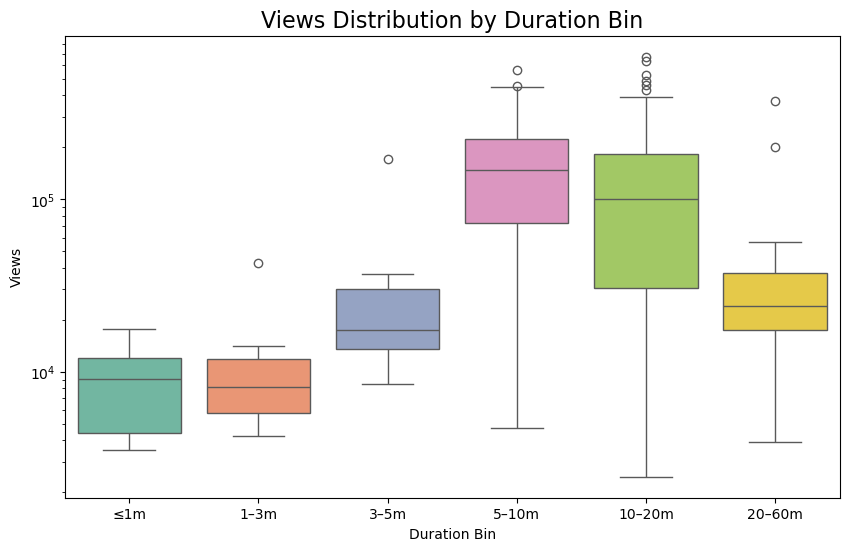

In [47]:
plt.figure(figsize=(10,6))
sns.boxplot(x='duration_bin', y='views', data=df, palette='Set2')
plt.title('Views Distribution by Duration Bin', fontsize=16)
plt.xlabel('Duration Bin')
plt.ylabel('Views')
plt.yscale('log')
plt.show()

#### Daily Views Trend

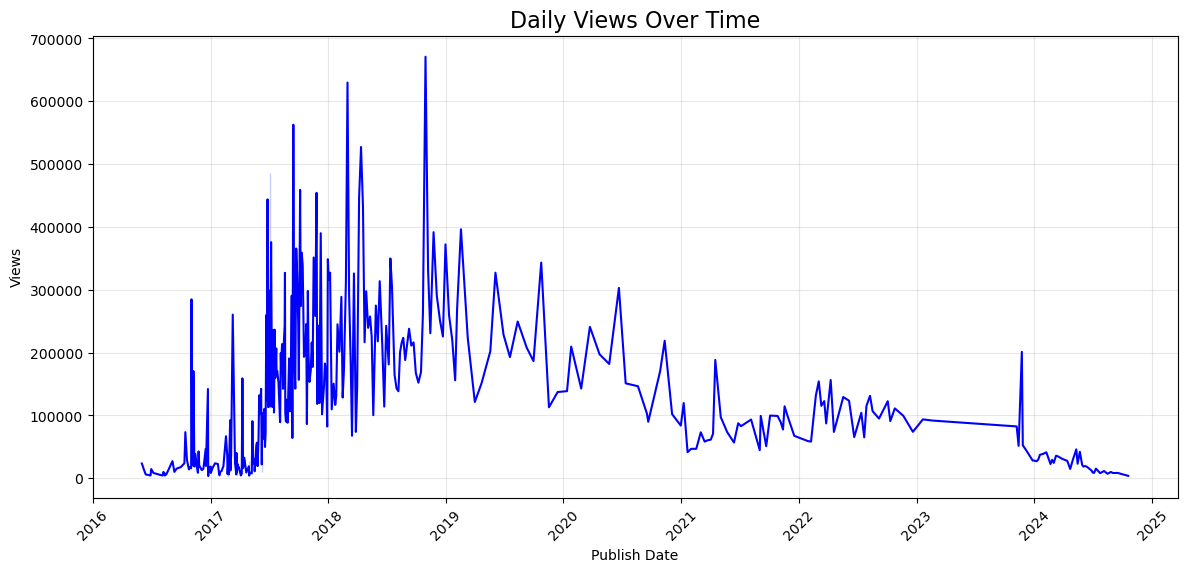

In [48]:
plt.figure(figsize=(14,6))
sns.lineplot(x='video_publish_time', y='views', data=df, color='blue')
plt.title('Daily Views Over Time', fontsize=16)
plt.xlabel('Publish Date')
plt.ylabel('Views')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

#### Revenue vs Views

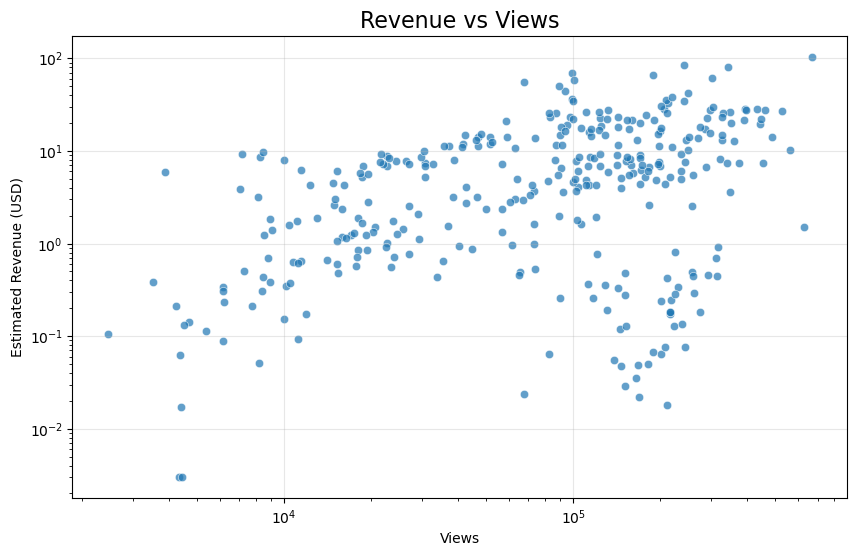

In [49]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='views', y='estimated_revenue_usd', data=df, alpha=0.7)
plt.title('Revenue vs Views', fontsize=16)
plt.xlabel('Views')
plt.ylabel('Estimated Revenue (USD)')
plt.xscale('log')  # helps visualize wide ranges
plt.yscale('log')
plt.grid(alpha=0.3)
plt.show()

#### Correlation Heatmap

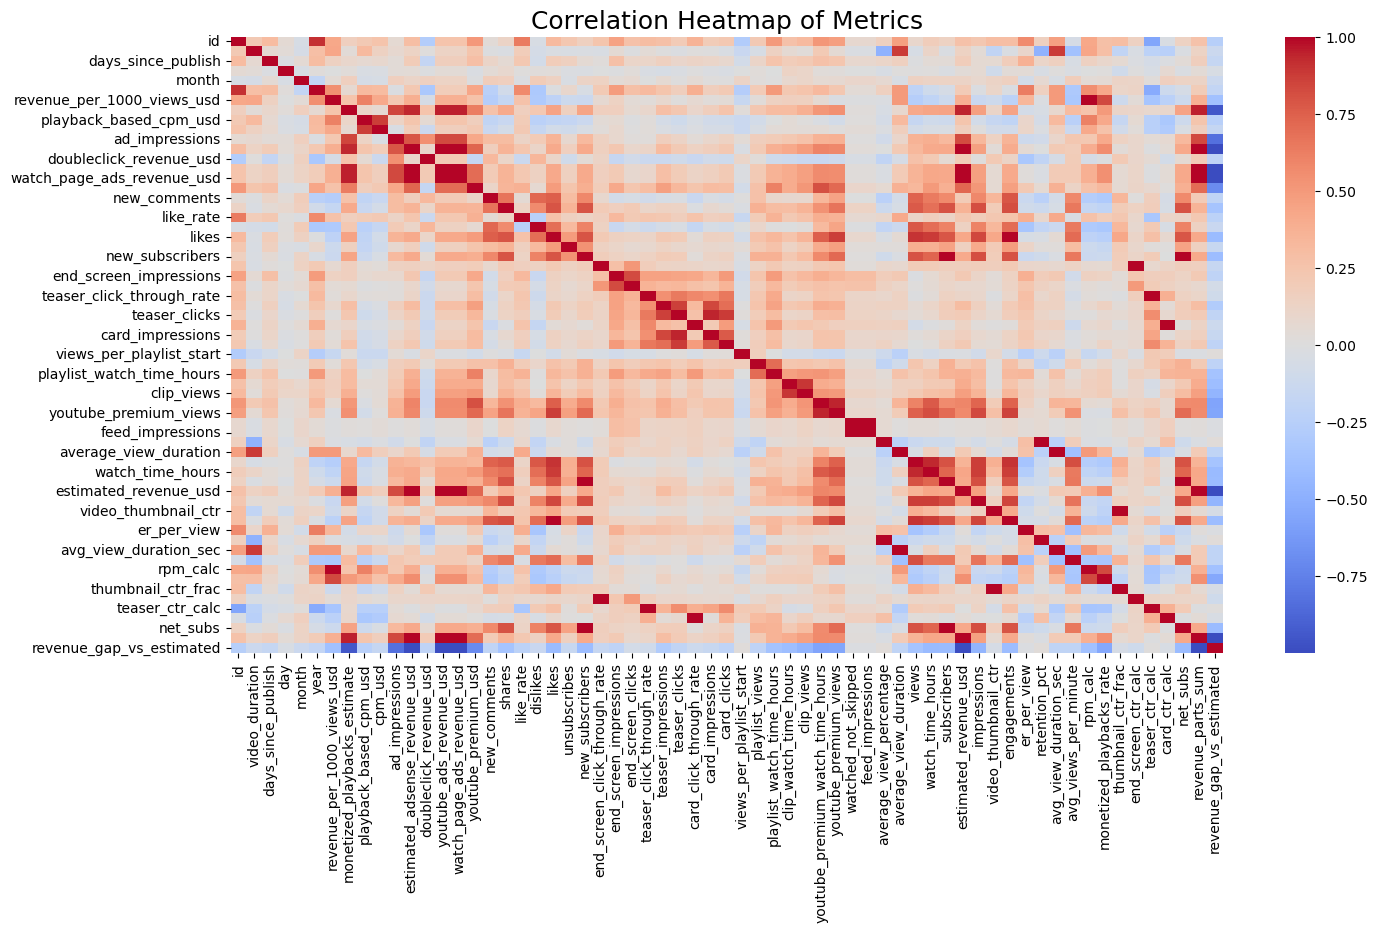

In [50]:
plt.figure(figsize=(16,8))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()

sns.heatmap(corr, cmap='coolwarm', center=0, annot=False, cbar=True)
plt.title('Correlation Heatmap of Metrics', fontsize=18)
plt.show()

## 📌 Conclusions & Insights

### 1) Engagement
- Only **~5%** of viewers engage (likes, comments, shares).  
- Top-performing videos reach **~13%** engagement.  
- **High views but low engagement** likely due to non-subscriber audiences.  
- The **second half of the year** drives more cumulative views and engagement.  

### 2) Retention & Watch Duration
- Average retention is **~45%**, with very few videos crossing **60%**.  
- No significant correlation between retention and engagement.  

### 3) Monetization
- Most videos show **low RPM** because of low view counts.  
- **RPM trend is improving**, showing potential for revenue growth.  

### 4) Thumbnail & CTR Metrics
- **Thumbnail CTR** is relatively strong, but **Card CTR is inconsistent** with several outliers.  
- CTR metrics are **weakly correlated**, indicating each element needs separate optimization.  

### 5) Subscriber Movement
- Most videos attract **very few subscribers individually**.  
- Subscriber growth peaked in **2017–2018**, coinciding with **higher publishing volume**.  
- More views generally lead to more subscribers.  

### 6) Duration Insights
- **5–10 min videos** generate the **highest views** consistently.  
- **10–20 min videos** have higher variability but good potential.  
- **Longer videos (20–60 min)** yield the **highest RPM**, though with fewer total views.  

---

## 🎯 General Recommendations
- **Focus on core formats:** Maintain 5–10 min videos for consistent reach and experiment with longer videos to boost RPM.  
- **Improve viewer conversion:** Encourage engagement and subscriptions through stronger CTAs and related end-screen links.  
- **Optimize creative elements:** Test thumbnails, card placements, and hooks regularly.  
- **Publish consistently:** A regular upload schedule can rebuild momentum similar to earlier growth years.  
- **Monitor key KPIs:** Engagement %, retention, subs per 1,000 views, and RPM to measure performance improvements.  